# <center>Exercises</center>

<div class="alert alert-block alert-warning">
<b>Exercise 0:</b> Create a new folder and notebook called <b>Intro-Data-Analysis-Pandas-Exercises</b> where you will perform all the exercises below. Make sure to copy any code you need from this notebook to that one. You will use that folder to create a new GitHub repo with the code, html, and slides as usual.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> Create a new dataframe <code>pop</code> with population data downloaded from <a href="https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)">Wikipedia</a>. Make sure to clean the data so it can be used further.
</div>

In [ ]:
# Import display options for showing websites
from IPython.display import IFrame
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'
IFrame(url, width=800, height=400)

isocodes = pd.read_html(url, encoding='utf-8')[0]
isocodes

isocodes.columns

isocodes = isocodes.droplevel(0, axis=1)
isocodes.head()

mycols = isocodes.columns
mycols = [c[:c.find('[')].strip() for c in mycols]
mycols



['ISO 3166',
 'World Factbook',
 'Sovereignty',
 'A-2',
 'A-3',
 'Num.',
 'ISO 3166-2',
 'TLD']

In [ ]:
isocodes.columns = mycols

In [ ]:
isocodes.rename(columns={'ISO 3166-2': 'Subdivision code links'}, inplace= True)


In [ ]:
isocodes['Alpha-2 code original'] = isocodes['A-2']
isocodes['A-2'] = isocodes['Subdivision code links'].apply(lambda x: x[x.find(':')+1:])
isocodes.head()

,ISO 3166,World Factbook,Sovereignty,A-2,A-3,Num.,Subdivision code links,TLD,Alpha-2 code original
0,Afghanistan,The Islamic Republic of Afghanistan,UN member,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax,AX
2,Albania,The Republic of Albania,UN member,AL,ALB,008,ISO 3166-2:AL,.al,AL
3,Algeria,The People's Democratic Republic of Algeria,UN member,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as,AS


In [ ]:

url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
tables = pd.read_html(url)


In [ ]:
isocodes.rename(columns={'ISO 3166': 'Country'}, inplace= True)

In [ ]:
population_table = tables[0]
population_table = population_table.iloc[:, :-1]
population_table.head()

,Unnamed: 0,Location,Population,% of world,Date,Source (official or from the United Nations)
0,NaN,World,8096595000,100%,23 Mar 2024,UN projection[3]
1,[b],China,1409670000,NaN,31 Dec 2023,Official estimate[5]
2,[b],India,1392329000,NaN,1 Jul 2023,Official projection[6]
3,3,United States,335893238,NaN,1 Jan 2024,Official estimate[7]
4,4,Indonesia,279118866,NaN,1 Jul 2023,National annual projection[8]


In [ ]:
population_table.columns = ['Rank', 'Country (or dependent territory)', 'Population', '% of world population', 'Date', 'Source']
pop = population_table[['Country (or dependent territory)', 'Population']]
pop.rename(columns={'Country (or dependent territory)': 'Country'}, inplace= True)
print(pop.head())

         Country  Population
0          World  8096595000
1          China  1409670000
2          India  1392329000
3  United States   335893238
4      Indonesia   279118866
/tmp/ipykernel_83/4198477249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop.rename(columns={'Country (or dependent territory)': 'Country'}, inplace= True)


<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Merge the <code>isocodes</code> and <code>pop</code> dataframes.
</div>

In [ ]:
merged = isocodes.merge(pop, left_on='Country', right_on='Country')
merged

,Country,World Factbook,Sovereignty,A-2,A-3,Num.,Subdivision code links,TLD,Alpha-2 code original,Population
0,Afghanistan,The Islamic Republic of Afghanistan,UN member,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,34262840
1,Albania,The Republic of Albania,UN member,AL,ALB,008,ISO 3166-2:AL,.al,AL,2761785
2,Algeria,The People's Democratic Republic of Algeria,UN member,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,45400000
3,Andorra,The Principality of Andorra,UN member,AD,AND,020,ISO 3166-2:AD,.ad,AD,85101
4,Angola,The Republic of Angola,UN member,AO,AGO,024,ISO 3166-2:AO,.ao,AO,34094077
...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,The Republic of Uzbekistan,UN member,UZ,UZB,860,ISO 3166-2:UZ,.uz,UZ,36599764
151,Vanuatu,The Republic of Vanuatu,UN member,VU,VUT,548,ISO 3166-2:VU,.vu,VU,301295
152,Yemen,The Republic of Yemen,UN member,YE,YEM,887,ISO 3166-2:YE,.ye,YE,31888698
153,Zambia,The Republic of Zambia,UN member,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,19610769


<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Merge the dataframes we have created so far to have a unique dataframe that has ISO codes, GDP per capita, and population data.
</div>

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
IFrame(url, width=800, height=400)
gdppc_wiki = pd.read_html(url, encoding='utf-8')[1]
gdppc_wiki
gdppc_wiki.columns = ['Country/Territory', 'UN Region', 'gdppc_IMF', 'year_IMF',
                      'gdppc_WB', 'year_WB', 'gdppc_CIA', 'year_CIA']
gdppc_wiki.head()
gdppc_wiki['country_name'] = gdppc_wiki['Country/Territory'].str.replace('*', '', regex=True).str.strip()
gdppc_wiki.head()
gdppc_wiki.dtypes
for c in gdppc_wiki.columns[2:-1]:
    if gdppc_wiki[c].dtype=='O':
        gdppc_wiki[c] = pd.to_numeric(gdppc_wiki[c].str.replace('—', 'nan'), errors='coerce')
        if c.startswith('year'):
            gdppc_wiki[c] = gdppc_wiki[c].astype('Int64')

In [ ]:
merged2 = merged.merge(gdppc_wiki, left_on='Country', right_on='country_name')
merged2

,Country,World Factbook,Sovereignty,A-2,A-3,Num.,Subdivision code links,TLD,Alpha-2 code original,Population,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA,country_name
0,Afghanistan,The Islamic Republic of Afghanistan,UN member,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,34262840,Afghanistan *,Asia,1991.0,2021,1674.0,2021,1500,2021,Afghanistan
1,Albania,The Republic of Albania,UN member,AL,ALB,008,ISO 3166-2:AL,.al,AL,2761785,Albania *,Europe,19566.0,2023,18552.0,2022,14500,2021,Albania
2,Algeria,The People's Democratic Republic of Algeria,UN member,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,45400000,Algeria *,Africa,13682.0,2023,13210.0,2022,11000,2021,Algeria
3,Andorra,The Principality of Andorra,UN member,AD,AND,020,ISO 3166-2:AD,.ad,AD,85101,Andorra *,Europe,68232.0,2023,NaN,<NA>,49900,2015,Andorra
4,Angola,The Republic of Angola,UN member,AO,AGO,024,ISO 3166-2:AO,.ao,AO,34094077,Angola *,Africa,7077.0,2023,6974.0,2022,5900,2021,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,The Republic of Uzbekistan,UN member,UZ,UZB,860,ISO 3166-2:UZ,.uz,UZ,36599764,Uzbekistan *,Asia,10316.0,2023,9533.0,2022,7700,2021,Uzbekistan
151,Vanuatu,The Republic of Vanuatu,UN member,VU,VUT,548,ISO 3166-2:VU,.vu,VU,301295,Vanuatu *,Oceania,2940.0,2023,3289.0,2022,2800,2021,Vanuatu
152,Yemen,The Republic of Yemen,UN member,YE,YEM,887,ISO 3166-2:YE,.ye,YE,31888698,Yemen *,Asia,2053.0,2023,3437.0,2013,2500,2017,Yemen
153,Zambia,The Republic of Zambia,UN member,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,19610769,Zambia *,Africa,4068.0,2023,3894.0,2022,3200,2021,Zambia


<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Use the <code>os</code> package to create folders to export data and figures. 
Since you will be using the names of these folders a lot, save their names in variables called <code>path</code>, <code>pathout</code>, and <code>pathgraphs</code>, where <code>path = './data/'</code>, <code>pathout = './data/'</code>, and <code>pathgraphs = './graphs/'</code>
</div>

In [ ]:
import os

# Define folder paths
path = './data/'
pathout = './data/'
pathgraphs = './graphs/'

# Create folders if they don't exist
if not os.path.exists(path):
    os.makedirs(path)

if not os.path.exists(pathout):
    os.makedirs(pathout)

if not os.path.exists(pathgraphs):
    os.makedirs(pathgraphs)


<div class="alert alert-block alert-warning">
    <b>Exercise 5:</b> Save the dataframe created in Exercise 3 as a <b>CSV, XLSX, and Stata</b> file into the <code>pathout</code> folder. Use a variable called <code>filename = 'Wiki_Data'</code> so you can use similar code to save all file types. Notice only the filetype will change. 
    <b>Hint:</b> If you get econding errors for Stata, use the keyword <code>version=118</code> inside the <code>to_stata</code> function.
</div>

In [ ]:
filename = 'Wiki_Data'

# Save as CSV
csv_filename = os.path.join(pathout, filename + '.csv')
pop.to_csv(csv_filename, index=False)

# Save as XLSX
xlsx_filename = os.path.join(pathout, filename + '.xlsx')
pop.to_excel(xlsx_filename, index=False)

# Save as Stata
stata_filename = os.path.join(pathout, filename + '.dta')
pop.to_stata(stata_filename, version=118)

<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Create plots showing the relation between GDP per capita and Population. Create all 4 types of possible regression plots (levels-levels, levels-logs, logs-levels, logs-logs) and save them as <b> PNG, PDF, and JPG</b> files. Make sure to save them in the folder you created for <b>graphs</b>
</div>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
merged2.columns


Index(['Country', 'World Factbook', 'Sovereignty', 'A-2', 'A-3', 'Num.',
       'Subdivision code links', 'TLD', 'Alpha-2 code original', 'Population',
       'Country/Territory', 'UN Region', 'gdppc_IMF', 'year_IMF', 'gdppc_WB',
       'year_WB', 'gdppc_CIA', 'year_CIA', 'country_name'],
      dtype='object')

In [ ]:
merged2.head()

,Country,World Factbook,Sovereignty,A-2,A-3,Num.,Subdivision code links,TLD,Alpha-2 code original,Population,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA,country_name
0,Afghanistan,The Islamic Republic of Afghanistan,UN member,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,34262840,Afghanistan *,Asia,1991.0,2021,1674.0,2021,1500,2021,Afghanistan
1,Albania,The Republic of Albania,UN member,AL,ALB,008,ISO 3166-2:AL,.al,AL,2761785,Albania *,Europe,19566.0,2023,18552.0,2022,14500,2021,Albania
2,Algeria,The People's Democratic Republic of Algeria,UN member,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,45400000,Algeria *,Africa,13682.0,2023,13210.0,2022,11000,2021,Algeria
3,Andorra,The Principality of Andorra,UN member,AD,AND,020,ISO 3166-2:AD,.ad,AD,85101,Andorra *,Europe,68232.0,2023,NaN,<NA>,49900,2015,Andorra
4,Angola,The Republic of Angola,UN member,AO,AGO,024,ISO 3166-2:AO,.ao,AO,34094077,Angola *,Africa,7077.0,2023,6974.0,2022,5900,2021,Angola


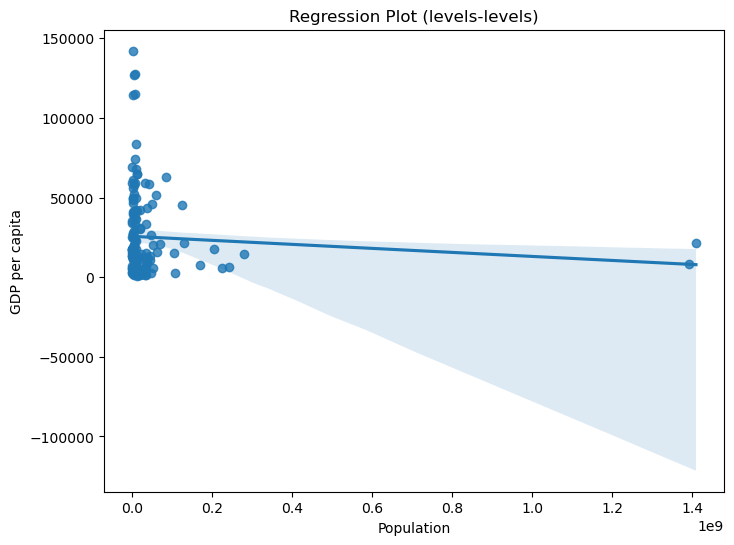

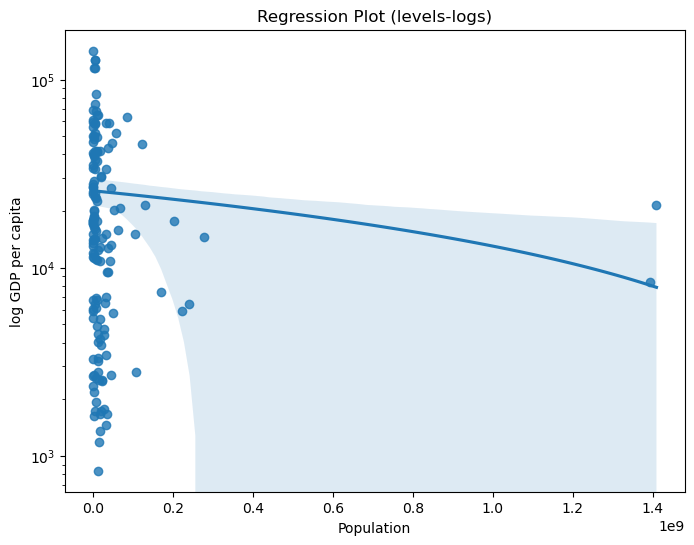

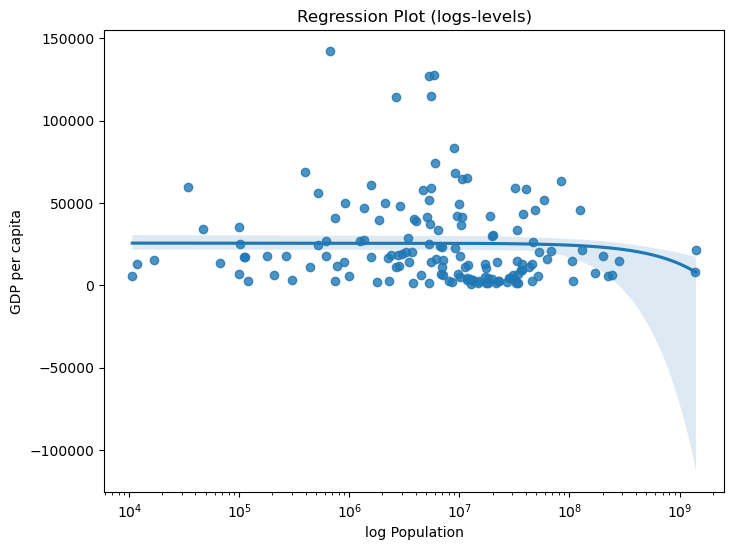

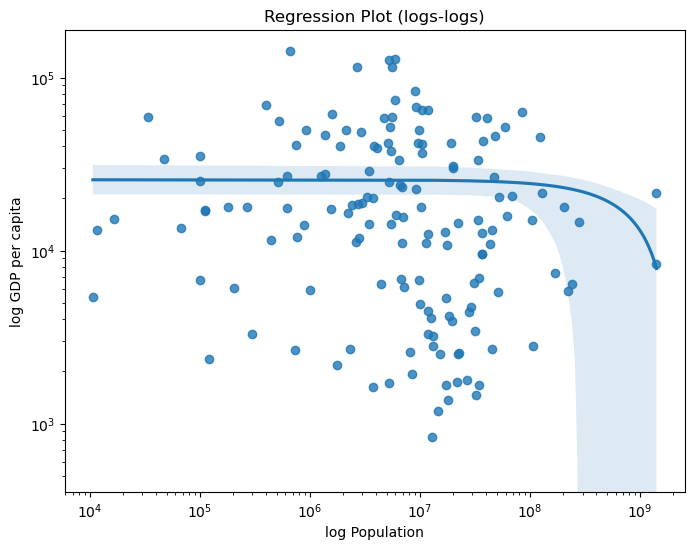

In [ ]:
plots=[]
plot_types = ['levels-levels', 'levels-logs', 'logs-levels', 'logs-logs']
for plot_type in plot_types:
    # Setting up the plot
    plt.figure(figsize=(8, 6))
    
    # Creating the plot
    if plot_type == 'levels-levels':
        sns.regplot(x='Population', y='gdppc_WB', data=merged2)
        plt.title(f'Regression Plot ({plot_type})')
        plt.xlabel('Population')
        plt.ylabel('GDP per capita')
    elif plot_type == 'levels-logs':
        sns.regplot(x='Population', y='gdppc_WB', data=merged2)
        plt.yscale('log')
        plt.title(f'Regression Plot ({plot_type})')
        plt.xlabel('Population')
        plt.ylabel('log GDP per capita')
    elif plot_type == 'logs-levels':
        sns.regplot(x='Population', y='gdppc_WB', data=merged2)
        plt.xscale('log')
        plt.title(f'Regression Plot ({plot_type})')
        plt.xlabel('log Population')
        plt.ylabel('GDP per capita')
    elif plot_type == 'logs-logs':
        sns.regplot(x='Population', y='gdppc_WB', data=merged2)
        plt.xscale('log')
        plt.yscale('log')
        plt.title(f'Regression Plot ({plot_type})')
        plt.xlabel('log Population')
        plt.ylabel('log GDP per capita')
    plots.append(plt)
    


In [ ]:
for i, plot in enumerate(plots):
    filename_prefix = f"regplot_{plot_types[i]}"
    plot.savefig(f"{filename_prefix}.png", dpi=300, bbox_inches="tight")
    plot.savefig(f"{filename_prefix}.jpg", dpi=300, bbox_inches="tight")
    plot.savefig(f"{filename_prefix}.pdf", bbox_inches="tight")
    print(f"Saved {filename_prefix}.png, {filename_prefix}.jpg, and {filename_prefix}.pdf")

# Show the plots (optional)
plt.show()

Saved regplot_levels-levels.png, regplot_levels-levels.jpg, and regplot_levels-levels.pdf
Saved regplot_levels-logs.png, regplot_levels-logs.jpg, and regplot_levels-logs.pdf
Saved regplot_logs-levels.png, regplot_logs-levels.jpg, and regplot_logs-levels.pdf
Saved regplot_logs-logs.png, regplot_logs-logs.jpg, and regplot_logs-logs.pdf


<Figure size 640x480 with 0 Axes>

<div class="alert alert-block alert-warning">
<b>Exercise 7:</b> Create plots showing the relation between GDP per capita and Population Growth. Create all 4 types of possible regression plots (levels-levels, levels-logs, logs-levels, logs-logs) and save them as <b> PNG, PDF, and JPG</b> files. Make sure to save them in the folder you created for <b>graphs</b>
</div>

Notebook written by [Ömer Özak](http://omerozak.com) for his students in Economics at [Southern Methodist University](http://www.smu.edu). Feel free to use, distribute, or contribute.

[<center><img src="https://github.com/measuring-culture/Expanding-Measurement-Culture-Facebook-JRSI/blob/main/pics/SMUlogowWordmarkRB.jpg?raw=true" width="250"></center>](http://omerozak.com)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=95d4285b-443a-47e9-a5ce-ae6a0ac7fcee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>